In [1]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 
sys.path.append("/Users/edwardlrichards/swellEx") 

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime as d
from scipy import signal

import loadCSDM as cm
import swellEx_env
from normalMode import Chinook
from beamformers import bartlet
import loadSIO as sio

# Compare online data file to server data

In [2]:
# Experimental data
dataFile1 = '/Users/edwardlrichards/swellEx/data/J1312315.vla.21els.sio'
dataFile2 = '/Users/edwardlrichards/Documents/data/SWellEx96/VLA_J131_2302'

year = str(1996)
experimentStart_1 = d.datetime.strptime(year + 'J1312315',\
                                      '%YJ%j%H%M')
experimentStart_2 = d.datetime.strptime(year+dataFile2[-9:],'%YJ%j_%H%M')
fs = 1500
snapLength = 16
numSamples = snapLength * fs

frequencies = [49, 64, 79, 94, 112, 130, 148, 166, 201, 235, 283, 338, 388]

In [3]:
dT = (experimentStart_1 - experimentStart_2).seconds
df2_offset = dT * fs
arbitraryNum = np.floor(5.692772 * fs)
df2_offset -= arbitraryNum

In [4]:
# load data file
cha1 = [0, 20]
data = sio.load_selection(dataFile1, -1, 0, cha1)
ts1 = data['data']
# ts1 = data - np.mean(data,axis=0)

In [5]:
# load data file
sampleStart = df2_offset * fs
cha2 = [0, 63]
data = sio.load_selection(dataFile2, -1, 0, cha2)
ts2 = data['data']
# ts2 = data - np.mean(data,axis=0)

In [6]:
ts1 -= np.mean(ts1, axis = 0)
# ts1 /= np.max(ts1, axis=0)

In [7]:
ts2 = ts2[:(2700000-1),:]
ts2 -= np.mean(ts2, axis = 0)
ts2 *= 0.25

In [8]:
np.argmax(ts2, axis=0)

array([1811806, 1790916])

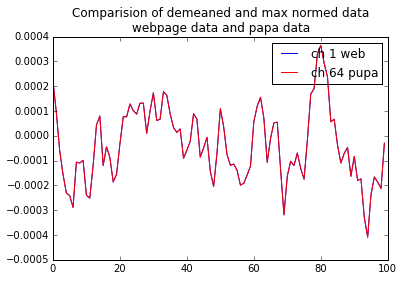

In [9]:
cp1 = 0
cp2 = 1
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.plot(ts1[:100, cp1], label='ch %i web'%(cha1[cp1] + 1))
_ = ax.plot(ts2[df2_offset:(df2_offset+100),cp2], 'r', label='ch %i pupa'%(cha2[cp2]+1))
# _ = plt.ylim(-.8, .8)
_ = plt.title('Comparision of demeaned and max normed data\n'+\
         'webpage data and papa data')
_ = plt.legend()

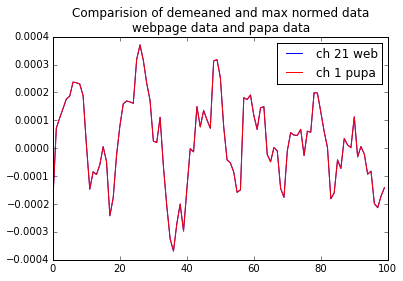

In [10]:
cp1 = 1
cp2 = 0
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.plot(ts1[:100, cp1], label='ch %i web'%(cha1[cp1] + 1))
_ = ax.plot(ts2[df2_offset:(df2_offset+100),cp2], 'r', label='ch %i pupa'%(cha2[cp2]+1))
# _ = plt.ylim(-.8, .8)
_ = plt.title('Comparision of demeaned and max normed data\n'+\
         'webpage data and papa data')
_ = plt.legend()